<a href="https://colab.research.google.com/github/BenShieh233/LearnPython/blob/main/Question_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base Model (Distributed to Students)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#inputs
market_multiplier = 1.1
p_baseline = 100
p_gps = 40
p_modular = 35
p_camera = 20
p_battery = 15
investment_cost = 90

In [7]:
#profit projection calculation
profit = p_baseline + market_multiplier*((p_gps + p_modular + p_camera + p_battery)**0.5)
net_profit = profit - investment_cost
print(f'The projected net profit of launching this product is {net_profit} million dollars')

The projected net profit of launching this product is 21.536897329871664 million dollars


In [8]:
def net_profit(market_multiplier,
               p_baseline,
               p_gps,
               p_modular,
               p_camera,
               p_battery,
               investment_cost):
  profit = p_baseline + market_multiplier*((p_gps + p_modular + p_camera + p_battery)**0.5)
  net_profit = profit - investment_cost
  return net_profit

In [9]:
sim_num = 10000
sim_multiplier = np.random.normal(1.1,0.1,sim_num)
sim_p_baseline = np.random.normal(100,10,sim_num)
sim_p_gps = np.random.normal(40,8,sim_num)
sim_p_modular = np.random.normal(35,20,sim_num)
sim_p_camera = np.random.normal(20,7,sim_num)
sim_p_battery = np.random.normal(15,8,sim_num)
sim_investment_cost = np.random.normal(90,10,sim_num)

In [15]:
# Create a list of simulated profits
sim_profits = [net_profit(market_multiplier = sim_multiplier[i],
                          p_baseline = sim_p_baseline[i],
                          p_gps = sim_p_gps[i],
                          p_modular = sim_p_modular[i],
                          p_camera = sim_p_camera[i],
                          p_battery = sim_p_battery[i],
                          investment_cost = sim_investment_cost[i]) for i in range(sim_num)]

(array([  22.,  140.,  609., 1581., 2758., 2621., 1561.,  588.,  109.,
          11.]), array([-30.23825426, -19.83782043,  -9.4373866 ,   0.96304722,
         11.36348105,  21.76391488,  32.16434871,  42.56478254,
         52.96521637,  63.3656502 ,  73.76608402]), <a list of 10 Patch objects>)

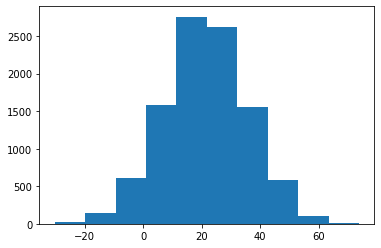

In [23]:
# Plot a histogram of the simulated 10000 net profit outcomes
df = pd.DataFrame(zip(sim_multiplier,sim_p_baseline, sim_p_gps, sim_p_modular,
                      sim_p_camera, sim_p_battery, sim_investment_cost, sim_profits), columns = ["sim_multiplier", "sim_p_baseline", "sim_p_gps",
                                                                                                 "sim_p_modular", "sim_p_camera", "sim_p_battery",
                                                                                                 "sim_investment_cost", "sim_profits"])
plt.hist(df.sim_profits)

In [35]:
# Simulated probability of a negative profit
df["negative"] = df["sim_profits"] < 0
print("The simulated robability of a negative profit is:",df["negative"].mean())

The simulated robability of a negative profit is: 0.0671


In [38]:
df.iloc[:,0:7]

,sim_multiplier,sim_p_baseline,sim_p_gps,sim_p_modular,sim_p_camera,sim_p_battery,sim_investment_cost
0,1.209396,92.576242,32.653088,32.010352,11.518802,31.677695,92.792993
1,0.978067,103.493521,43.662481,16.166561,26.273195,16.912846,75.916033
2,1.036502,108.938934,38.306336,27.996768,31.604085,13.478937,84.175814
3,1.231621,97.782809,63.772759,49.938162,19.387004,7.980118,89.801672
4,1.027574,106.233033,54.127105,21.506843,21.548070,13.691851,73.080280
...,...,...,...,...,...,...,...
9995,0.977936,104.602318,32.646406,82.295804,9.542452,5.483797,108.230642
9996,1.223313,107.515332,37.908899,26.893382,16.392741,19.785817,83.751670
9997,1.019708,104.028789,41.926604,20.719962,25.845445,4.913386,91.129836
9998,1.176376,99.093215,27.547162,26.395647,22.700900,12.327197,100.666668


In [39]:
# Run a multiple linear regression analysis
import statsmodels.api as sm
X = sm.add_constant(df.iloc[:,0:7])
y = df.iloc[:,7]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
mod = sm.OLS(y,X,hasconstant=True)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sim_profits   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.196e+07
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:22:37   Log-Likelihood:                 4400.5
No. Observations:               10000   AIC:                            -8785.
Df Residuals:                    9992   BIC:                            -8727.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.8929      0.029   -203.480      0.000      -5.950      -5.836
sim_multiplier         10.4500      0.016    667.989      0.000      10.419      10.481
sim_p_baseline          0.9999      0.000   6423.051      0.000       1.000       1.000
sim_p_gps               0.0534      0.000    276.162      0.000       0.053       0.054
sim_p_modular           0.0534   7.76e-05    688.459      0.000       0.053       0.054
sim_p_camera            0.0533      0.000    239.350      0.000       0.053       0.054
sim_p_battery           0.0533      0.000    274.445      0.000       0.053       0.054
sim_investment_cost    -1.0000      0.000  -6410.377      0.000      -1.000      -1.000
==============================================================================
Omnibus:                     6938.011   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           172557.532
Skew:                          -3.007   Prob(JB):                         0.00
Kurtosis:                      22.441   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Normalize coefficients to reflect standard deviations of inputs
result.params * X.std()

const                  -0.000000
sim_multiplier          1.041429
sim_p_baseline         10.015284
sim_p_gps               0.430681
sim_p_modular           1.073775
sim_p_camera            0.373380
sim_p_battery           0.428039
sim_investment_cost    -9.994321
dtype: float64

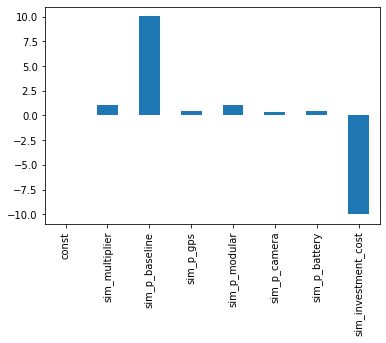

In [42]:
# bar graph these things
normalized_coefficients = result.params * X.std()
normalized_coefficients.plot.bar()

The effect of p_battery being one standard deviation above the baseline is 0.428039. 